# Plot $DD^{fibered}/DD^{complete}$ as a function of $\theta$

In [1]:
import os
import sys

import numpy as np
from matplotlib import pyplot as plt

import pycorr

sys.path.append('../bin')

# plotting
plt.style.use(os.path.join(os.path.abspath('../bin'), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

In [2]:
zranges = {'ELG': (0.8, 1.6), 'LRG':(0.4, 1.1), 'QSO':(0.8, 3.5)}

In [3]:
data_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3_1/paircounts/'

In [4]:
def get_dd(data_dir, tracer, region, zrange, return_rr=False, flavour='complete', weight='WEIGHT'):
    fn_dd = 'ddcounts_theta_mock0_{}_{}_{}_{:.1f}_{:.1f}_{}thetamax10.npy'.format(tracer, flavour, region, zrange[0], zrange[1], (weight+'_') if weight is not None else '')
    dd_counter = pycorr.TwoPointCounter.load(os.path.join(data_dir, fn_dd))
    print(os.path.join(data_dir, fn_dd))
    
    counts = dd_counter.wcounts/dd_counter.wnorm
    theta = dd_counter.sepavg()

    if return_rr:
        fn_rr = 'rrcounts_theta_mock0_{}_{}_{}_{:.1f}_{:.1f}_{}thetamax10.npy'.format(tracer, flavour, region, zrange[0], zrange[1], (weight+'_') if weight is not None else '')
        print(os.path.join(data_dir, fn_rr))
        rr_counter = pycorr.TwoPointCounter.load(os.path.join(data_dir, fn_rr))
        rrcounts = rr_counter.wcounts/rr_counter.wnorm
        
        return theta, counts, rrcounts
            
    return theta, counts

/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3_1/paircounts/ddcounts_theta_mock0_ELG_LOPnotqso_altmtl_SGC_0.8_1.6_WEIGHT_thetamax10.npy
/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3_1/paircounts/rrcounts_theta_mock0_ELG_LOPnotqso_altmtl_SGC_0.8_1.6_WEIGHT_thetamax10.npy
/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3/paircounts/ddcounts_theta_mock0_ELG_LOP_ffa_SGC_0.8_1.6_WEIGHT_thetamax10.npy
/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3/paircounts/rrcounts_theta_mock0_ELG_LOP_ffa_SGC_0.8_1.6_WEIGHT_thetamax10.npy
/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3_1/paircounts/ddcounts_theta_mock0_ELG_LOP_complete_SGC_0.8_1.6_WEIGHT_thetamax10.npy
/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3_1/paircounts/rrcounts_theta_mock0_ELG_LOP_complete_SGC_0.8_1.6_WEIGHT_thetamax10.npy
/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3_1/paircounts/ddcounts_theta_mock0_LRG_altmtl_SGC_0.4_1.1_WEIGHT_thetamax10.npy
/global/cfs/cdirs/desi/us

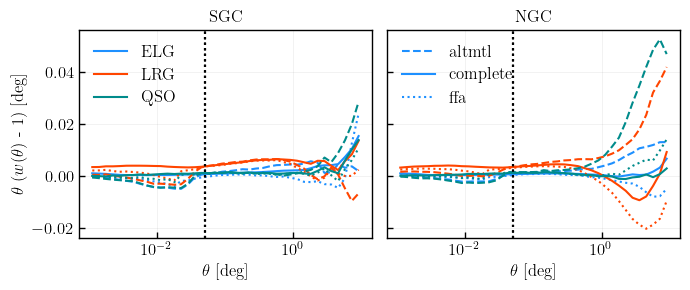

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

rr = True
    
for r, region in enumerate(['SGC', 'NGC']):
    for i, tracer in enumerate(['ELG_LOPnotqso', 'LRG', 'QSO']):
        theta, w_altmtl, rr_altmtl = get_dd(data_dir, tracer=tracer, region=region, zrange=zranges[tracer[:3]], return_rr=True, flavour='altmtl')
        theta, w_ffa, rr_ffa = get_dd('/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3/paircounts/', tracer=tracer[:7], region=region, zrange=zranges[tracer[:3]], return_rr=True, flavour='ffa')
        theta, w_complete, rr_complete = get_dd(data_dir, tracer=tracer[:7], region=region, zrange=zranges[tracer[:3]], return_rr=True, flavour='complete')

        if rr:
            w_altmtl /= rr_altmtl
            w_ffa /= rr_ffa
            w_complete /= rr_complete
            
        axes[r].semilogx(theta, theta * (w_altmtl - 1), ls='--', color='C{}'.format(i))
        axes[r].semilogx(theta, theta * (w_ffa - 1), ls=':', color='C{}'.format(i))
        axes[r].semilogx(theta, theta * (w_complete - 1), ls='-', color='C{}'.format(i), label=tracer[:3] if r==0 else '')
        
        axes[r].axvline(0.05, ls=':', color='black')
        axes[r].set_xlabel(r'$\theta$ [deg]')
        #axes[r].set_ylim((-0.001, 0.001))
        axes[r].set_title(region)
axes[1].plot([], [], color='C0', ls='--', label='altmtl')
axes[1].plot([], [], color='C0', ls='-', label='complete')
axes[1].plot([], [], color='C0', ls=':', label='ffa')
axes[0].set_ylabel(r'$\theta$ ($w(\theta)$ - 1) [deg]')
axes[0].legend()
axes[1].legend()
plt.show()

/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3_1/paircounts/ddcounts_theta_mock0_ELG_LOPnotqso_altmtl_SGC_0.8_1.6_WEIGHT_thetamax10.npy
/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3_1/paircounts/rrcounts_theta_mock0_ELG_LOPnotqso_altmtl_SGC_0.8_1.6_WEIGHT_thetamax10.npy
/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3/paircounts/ddcounts_theta_mock0_ELG_LOP_ffa_SGC_0.8_1.6_WEIGHT_thetamax10.npy
/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3/paircounts/rrcounts_theta_mock0_ELG_LOP_ffa_SGC_0.8_1.6_WEIGHT_thetamax10.npy
/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3_1/paircounts/ddcounts_theta_mock0_ELG_LOP_complete_SGC_0.8_1.6_WEIGHT_thetamax10.npy
/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3_1/paircounts/rrcounts_theta_mock0_ELG_LOP_complete_SGC_0.8_1.6_WEIGHT_thetamax10.npy
/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3_1/paircounts/ddcounts_theta_mock0_LRG_altmtl_SGC_0.4_1.1_WEIGHT_thetamax10.npy
/global/cfs/cdirs/desi/us

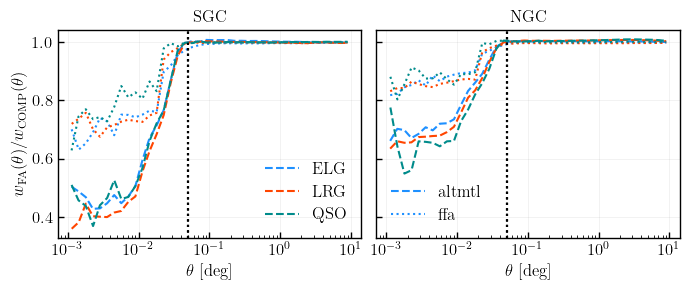

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

rr = True
    
for r, region in enumerate(['SGC', 'NGC']):
    for i, tracer in enumerate(['ELG_LOPnotqso', 'LRG', 'QSO']):
        theta, w_altmtl, rr_altmtl = get_dd(data_dir, tracer=tracer, region=region, zrange=zranges[tracer[:3]], return_rr=True, flavour='altmtl')
        theta, w_ffa, rr_ffa = get_dd('/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/v3/paircounts/', tracer=tracer[:7], region=region, zrange=zranges[tracer[:3]], return_rr=True, flavour='ffa')
        theta, w_complete, rr_complete = get_dd(data_dir, tracer=tracer[:7], region=region, zrange=zranges[tracer[:3]], return_rr=True, flavour='complete')

        if rr:
            w_altmtl /= rr_altmtl
            w_ffa /= rr_ffa
            w_complete /= rr_complete
            
        axes[r].semilogx(theta, w_altmtl / w_complete, ls='--', color='C{}'.format(i), label=tracer[:3] if r==0 else '')
        axes[r].semilogx(theta, w_ffa / w_complete, ls=':', color='C{}'.format(i))
        
        axes[r].axvline(0.05, ls=':', color='black')
        axes[r].set_xlabel(r'$\theta$ [deg]')
        #axes[r].set_ylim((-0.001, 0.001))
        axes[r].set_title(region)
axes[1].plot([], [], color='C0', ls='--', label='altmtl')
axes[1].plot([], [], color='C0', ls=':', label='ffa')
axes[0].set_ylabel(r'$w_{\mathrm{FA}}(\theta) / w_{\mathrm{COMP}}(\theta)$')
axes[0].legend()
axes[1].legend()
plt.show()